# JUDUL Vocabulary
## Kontributor: Rochim Farul Noviyan, Reyhan Venyutzky, Hasna Zakiyyah Harsari, Nur Aini Rakhmawati
## email kontributor: rochim.noviyan@gmail.com ,hasnazakiyyah16@gmail.com
## Departemen Sistem Informasi, Institut Teknologi Sepuluh Nopember
Abstrak:

*Linked data merupakan metode pembangunan data terstruktur sehingga dapat saling terkait pada web. Linked data dibangun oleh teknologi web standar seperti salah satunya model data RDF untuk menghubungkan data dari berbagai sumber dan memiliki fungsi seperti hyperlink yang menghubungkan sekumpulan halaman web di internet. Dengan sekumpulan data yang terhubung dapat membentuk global data space atau dikenal dengan web of data. Pada kesempatan kali ini kami akan membuat model data RDF dengan bersumber pada dataset e-commerce [jakmall](jakmall.com/). Model data RDF terlebih dahulu dibuat dengan menggunakan vocabulary biasa sebagai contoh untuk berpikir secara logika lalu dilanjutkan dengan mengubah vocabulary menjadi vocabulary yang populer seperti foaf dan schema.*

## Dataset

Dataset ini berisikan tentang data produk yang dijual pada salah satu online marketplace di Indonesia yaitu jakmall.com. Variabel dalam dataset ini mencakup nama produk, nama penjual, lokasi penjual, link url produk, harga produk, dan jumlah wishlist produk.

Tabel dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/rochimfn/d43d8f372126dfbade9b41c1e8490e7c/raw/ed69463ca6312daf020d4709ae3cc33ae2059dea/dataset.csv')
df.head()

,Seller_name,Seller_Location,Seller_Product,Seller_Product_url,Seller_price,Seller_product_wishlist
0,GudangGrosir,DKI Jakarta,TaffSTUDIO Splitter Audio Shape U 3.5mm ke Hea...,https://www.jakmall.com/gudanggrosir/taffstudi...,Rp 6.800,839
1,SoundSquare,DKI Jakarta,TaffSTUDIO Mikrofon Kondenser Studio dengan Sh...,https://www.jakmall.com/soundsquare/taffstudio...,Rp 83.200,1471
2,Kelvin Online Shop,DKI Jakarta,Taffware Gaming Mouse Pad XL Desk Mat Motif Pe...,https://www.jakmall.com/kelvin-online-shop/taf...,Rp 22.500,2132
3,Fast n Cheap,DKI Jakarta,Taffware ICE FAN 3 Universal Laptop Vacuum Cooler,https://www.jakmall.com/fast-n-cheap/taffware-...,Rp 54.600,654
4,Fast n Cheap,DKI Jakarta,Splitter Audio Cable 3.5mm Male to 3.5mm HiFi ...,https://www.jakmall.com/fast-n-cheap/splitter-...,Rp 5.400,331


## Vocabulary

### Namespace

* rdfs: <http://www.w3.org/2000/01/rdf-schema#>
* rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
* xsd: <http://www.w3.org/2001/XMLSchema#>
* ex: <http://example.com/>

### Kelas
* ex:Toko; Merupakan kelas untuk toko atau penjual yang memiliki lapak jualan.
  * Toko bertempat di Lokasi; Setiap toko harus memiliki lokasi.
  * Toko menjual Produk; Toko harus memiliki produk atau layanan yang dijual.
* ex:Lokasi; Menunjukkan lokasi atau tempat.
* ex:Produk; Menujukkan 'sesuatu' yang dihasilkan atau diperjual belikan.
  * Produk berharga mata uang; Produk dijual seharga beberapa nilai tergantung mata uang yang digunakan.

### Data
**Data 1**

GudangGrosir adalah toko. 
GudangGrosir bertempat di Jakarta. 
GudangGrosir menjual Headphone. 
Headphone berharga 6800. 

**Data 2**

SoundSquare adalah toko. 
SoundSquare bertempat di Jakarta. 
SoundSquare menjual Headphone. 
Headphone berharga 83200. 

**Data 3**

Computindo adalah toko. 
Computindo bertempat di Jakarta. 
Computindo menjual Headphone. 
Headphone berharga 459100. 

In [2]:
!python -m pip install --no-input jupyter-rdfify --quiet
%reload_ext jupyter-rdfify

You should consider upgrading via the 'C:\Users\rochim\Projects\tekweb-tugas-pertemuan4\venv\Scripts\python.exe -m pip install --upgrade pip' command.
C:\Users\rochim\Projects\tekweb-tugas-pertemuan4\venv\lib\site-packages\rdflib_jsonld\__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


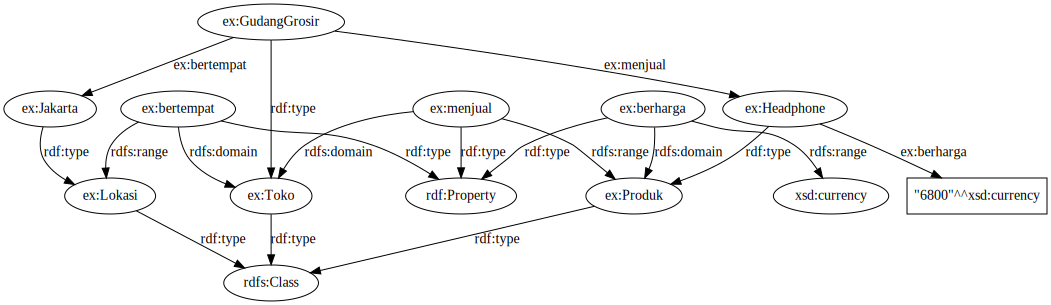

In [3]:
%%rdf turtle
## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.com/> .

## Class
ex:Toko a rdfs:Class .
ex:Lokasi a rdfs:Class .
ex:Produk a rdfs:Class .

## Properties
ex:bertempat a rdf:Property .
ex:bertempat rdfs:domain ex:Toko .
ex:bertempat rdfs:range ex:Lokasi .

ex:menjual a rdf:Property .
ex:menjual rdfs:domain ex:Toko .
ex:menjual rdfs:range ex:Produk .

ex:berharga a rdf:Property .
ex:berharga rdfs:domain ex:Produk .
ex:berharga rdfs:range xsd:currency .

## Data 1
ex:GudangGrosir a ex:Toko .
ex:Jakarta a ex:Lokasi .
ex:Headphone a ex:Produk .
ex:GudangGrosir ex:bertempat ex:Jakarta .
ex:GudangGrosir ex:menjual ex:Headphone .
ex:Headphone ex:berharga "6800"^^xsd:currency .

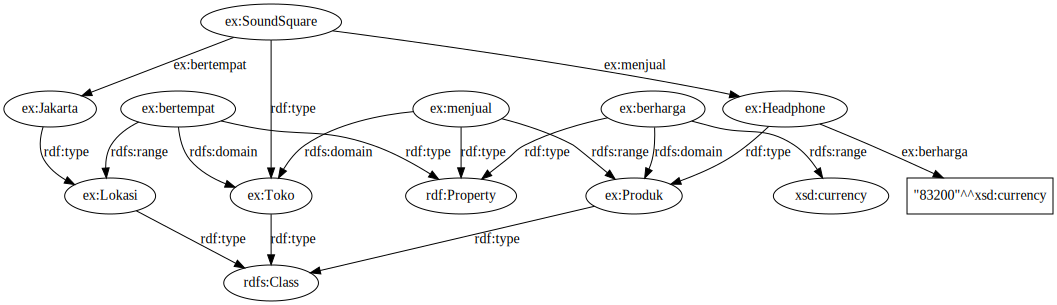

In [4]:
%%rdf turtle
## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.com/> .

## Class
ex:Toko a rdfs:Class .
ex:Lokasi a rdfs:Class .
ex:Produk a rdfs:Class .

## Properties
ex:bertempat a rdf:Property .
ex:bertempat rdfs:domain ex:Toko .
ex:bertempat rdfs:range ex:Lokasi .

ex:menjual a rdf:Property .
ex:menjual rdfs:domain ex:Toko .
ex:menjual rdfs:range ex:Produk .

ex:berharga a rdf:Property .
ex:berharga rdfs:domain ex:Produk .
ex:berharga rdfs:range xsd:currency .

## Data 2
ex:SoundSquare a ex:Toko .
ex:Jakarta a ex:Lokasi .
ex:Headphone a ex:Produk .
ex:SoundSquare ex:bertempat ex:Jakarta .
ex:SoundSquare ex:menjual ex:Headphone .
ex:Headphone ex:berharga "83200"^^xsd:currency .


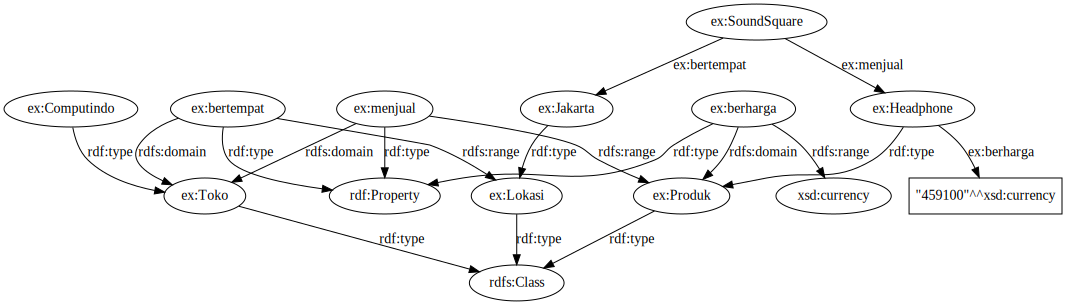

In [5]:
%%rdf turtle
## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.com/> .

## Class
ex:Toko a rdfs:Class .
ex:Lokasi a rdfs:Class .
ex:Produk a rdfs:Class .

## Properties
ex:bertempat a rdf:Property .
ex:bertempat rdfs:domain ex:Toko .
ex:bertempat rdfs:range ex:Lokasi .

ex:menjual a rdf:Property .
ex:menjual rdfs:domain ex:Toko .
ex:menjual rdfs:range ex:Produk .

ex:berharga a rdf:Property .
ex:berharga rdfs:domain ex:Produk .
ex:berharga rdfs:range xsd:currency .

## Data 3
ex:Computindo a ex:Toko .
ex:Jakarta a ex:Lokasi .
ex:Headphone a ex:Produk .
ex:SoundSquare ex:bertempat ex:Jakarta .
ex:SoundSquare ex:menjual ex:Headphone .
ex:Headphone ex:berharga "459100"^^xsd:currency .

## Vocabulary Perpanjangan dari Vocabulary Populer

### Namespace

* rdfs: <http://www.w3.org/2000/01/rdf-schema#>
* rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
* xsd: <http://www.w3.org/2001/XMLSchema#>
* dbpedia: <https://dbpedia.org/resource/>
* ex: <http://example.com/>
* gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> 
* schema: <https://schema.org/> 

### Kelas dan Properti
* BusinessEntity
  * BusinessEntity memiliki Location
  * BusinessEntity menawarkan (offers) Offering
* Location
* Offering
  * Offering bernama (name)
  * Offering memiliki spesifikasiharga (hasPriceSpecification) UnitPriceSpecification
* UnitPriceSpecification
  * memiliki mata uang (hasCurrency) dengan nilai xsd:currency
  * UnitPriceSpecification memiliki nilai harga (hasCurrencyValue dengan nilai numerik


### Data
**Data 1**

GudangGrosir adalah toko. 
GudangGrosir bertempat di Jakarta. 
GudangGrosir menjual Headphone. 
Headphone berharga 6800. 

**Data 2**

SoundSquare adalah toko. 
SoundSquare bertempat di Jakarta. 
SoundSquare menjual Headphone. 
Headphone berharga 83200. 

**Data 3**

Computindo adalah toko. 
Computindo bertempat di Jakarta. 
Computindo menjual Headphone. 
Headphone berharga 459100. 

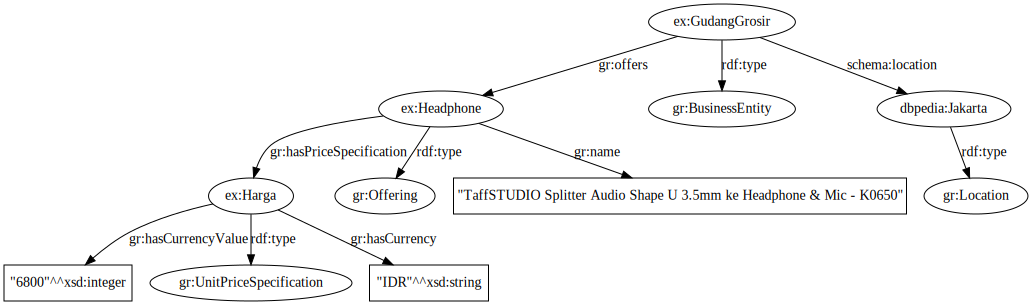

In [6]:
%%rdf turtle
# Data 1

## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

## Class

## Properties

## Data 1
ex:GudangGrosir a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:GudangGrosir schema:location dbpedia:Jakarta .

ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "IDR"^^xsd:string .
ex:Harga gr:hasCurrencyValue "6800"^^xsd:integer .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "TaffSTUDIO Splitter Audio Shape U 3.5mm ke Headphone & Mic - K0650" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:GudangGrosir gr:offers ex:Headphone .

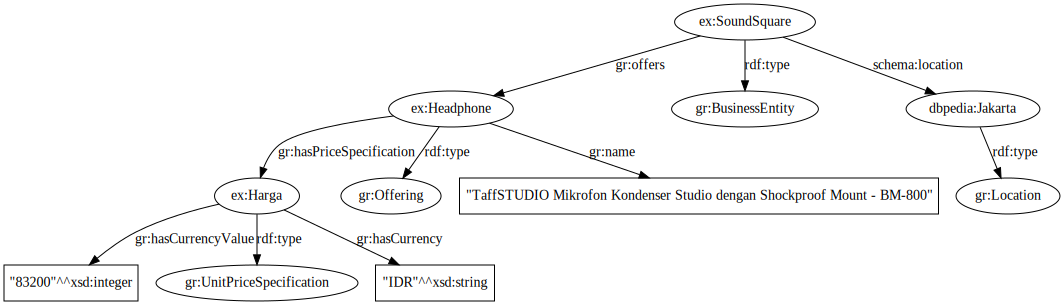

In [7]:
%%rdf turtle
# Data 2

## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

## Class

## Properties

## Data 1
ex:SoundSquare a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:SoundSquare schema:location dbpedia:Jakarta .

ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "IDR"^^xsd:string .
ex:Harga gr:hasCurrencyValue "83200"^^xsd:integer .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "TaffSTUDIO Mikrofon Kondenser Studio dengan Shockproof Mount - BM-800" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:SoundSquare gr:offers ex:Headphone .

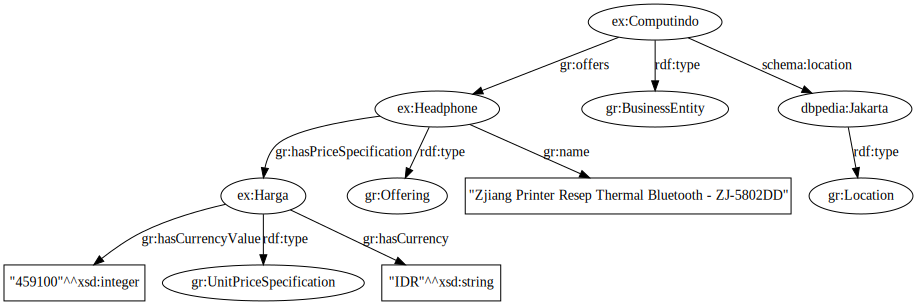

In [8]:
%%rdf turtle
# Data 3

## Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix dbpedia: <https://dbpedia.org/resource/> .
@prefix ex: <http://example.com/> .
@prefix gr: <http://www.heppnetz.de/ontologies/goodrelations/v1#> .
@prefix schema: <https://schema.org/> .

## Class

## Properties

## Data 1
ex:Computindo a gr:BusinessEntity .
dbpedia:Jakarta a gr:Location .
ex:Computindo schema:location dbpedia:Jakarta .

ex:Harga a gr:UnitPriceSpecification .
ex:Harga gr:hasCurrency "IDR"^^xsd:string .
ex:Harga gr:hasCurrencyValue "459100"^^xsd:integer .

ex:Headphone a gr:Offering .
ex:Headphone gr:name "Zjiang Printer Resep Thermal Bluetooth - ZJ-5802DD" .
ex:Headphone gr:hasPriceSpecification ex:Harga .

ex:Computindo gr:offers ex:Headphone .

##Daftar Pustaka:

1.   Rakhmawati, N. A. (2015). Semantic Web dan Linked Data. Yogyakarta, Indonesia: SiBuku.
2. Rochim Farul Noviyan, Hasna Zakiyyah Harsari, Reyhan Venyutzky, & Nur Aini Rakhmawati. (2021). rochimfn/tekweb-tugas-pertemuan4: Release v0.1 (v0.1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.5520879






